In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [35]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


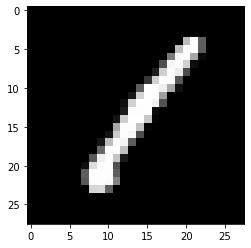

In [36]:
#convert first row into 1-D numpy array 
#matrix_nw = train.iloc[0].as_matrix()   //// as_matrix() can be removed in future so not using this
matrix_new = train.iloc[0].values
matrix_new = matrix_new[1:]
#matrix_new
#now reshape array in image size that is 28*28
matrix_new = matrix_new.reshape(28,28)
#visualize image
plt.imshow(matrix_new,cmap = 'gray')

In [37]:
# now split features and label for training purpose
y_train = train["label"]
x_train = train.drop(columns = {'label'})
training, validating,training_labels, validating_labels = train_test_split(x_train, y_train, train_size=0.8, random_state=0)


In [38]:
training.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
training_labels.head()

39317    6
32837    6
16644    4
20005    4
1533     2
Name: label, dtype: int64

In [40]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [41]:

classifiers = [
                
                SVC(),
               # LogisticRegression()
             ]

In [42]:
clf = SVC()
clf.fit(training, training_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
val_prdiction = clf.predict(validating)


NameError: name 'val_prediction' is not defined

In [44]:
acc = accuracy_score(validating_labels, val_prdiction)

In [45]:
acc

0.9747619047619047

In [46]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [47]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
predicted = clf.predict(test_data)

In [49]:
type(predicted)

numpy.ndarray

In [50]:
test_data["Label"] = predicted


In [53]:
x = [ i + 1 for i in range(len(test_data))]
test_data["ImageId"] = x

In [55]:
answer = test_data[["ImageId", "Label"]]
answer


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
answer.to_csv("result.csv",header=True,index=False)